In [16]:
from useful_scit.imps import (
    pd,np,xr,za,mpl,plt,sns, pjoin, os,glob,dt,sys,ucp,log, splot, crt) 
import re

In [9]:
path =\
    '/homeappl/home/aliagadi/wrk/DONOTREMOVE/'+\
    'flexpart_management_data/runs/run_2019-08-18_18-46-19_'

In [12]:
files = glob.glob(path+'/*/output*txt')
files.sort()

In [14]:
fdf = pd.DataFrame(files,columns=['path'])

In [19]:
_p1 = fdf.iloc[0]['path']

In [148]:
_str = ''
for i,r in fdf.iterrows():
    _p1 = r['path']
    with open(_p1,'r') as f:
        text = f.read()

    _iter=re.finditer('\nfile\ =.{5,1000}?Diego.{0,80}',text,flags=re.S)
    for i in _iter:
        _str += text[i.start():i.end()]

In [159]:
cases = re.findall('\d+?-\d+?-\d+?_\d+?:00:00',_str)

In [199]:
cas = 'cases'
dtime = 'dtime'
cdf = pd.DataFrame(cases,columns=[cas])
cdf[dtime]=pd.to_datetime(cdf[cas].str.replace('_',' '))
cdf = cdf[~cdf.duplicated(subset=cas)].reset_index(drop=True)
cdf['y']=1

In [81]:
path = '/proj/atm/saltena/runs/run_2019_05_15/wrf/wrfout_d04*'

In [84]:
_wrf_files = glob.glob(path)
_wrf_files.sort()

In [129]:
path='path'
wrf_df = pd.DataFrame(_wrf_files,columns=['path'])

In [130]:
mod_time = 'mod_time'
wrf_df[mod_time]=wrf_df.apply(lambda r: os.path.getmtime(r['path']),axis=1)
wrf_df[mod_time]=pd.to_datetime(wrf_df[mod_time],unit='s')

In [131]:
_mt = wrf_df[mod_time]

In [132]:
_res = (_mt-_mt.shift(1)).apply(lambda x: x.total_seconds()/3600)
time_delta = 'time_delta [hours]'
wrf_df[time_delta] = _res

In [ ]:
_p = wrf_df[path]
file_time = 'file_model_time'
_p = _p.str.slice(-19,None)
_p = _p.str.replace('_',' ')
_p = pd.to_datetime(_p)
wrf_df[file_time]=_p

(736740.6, 736829.15)


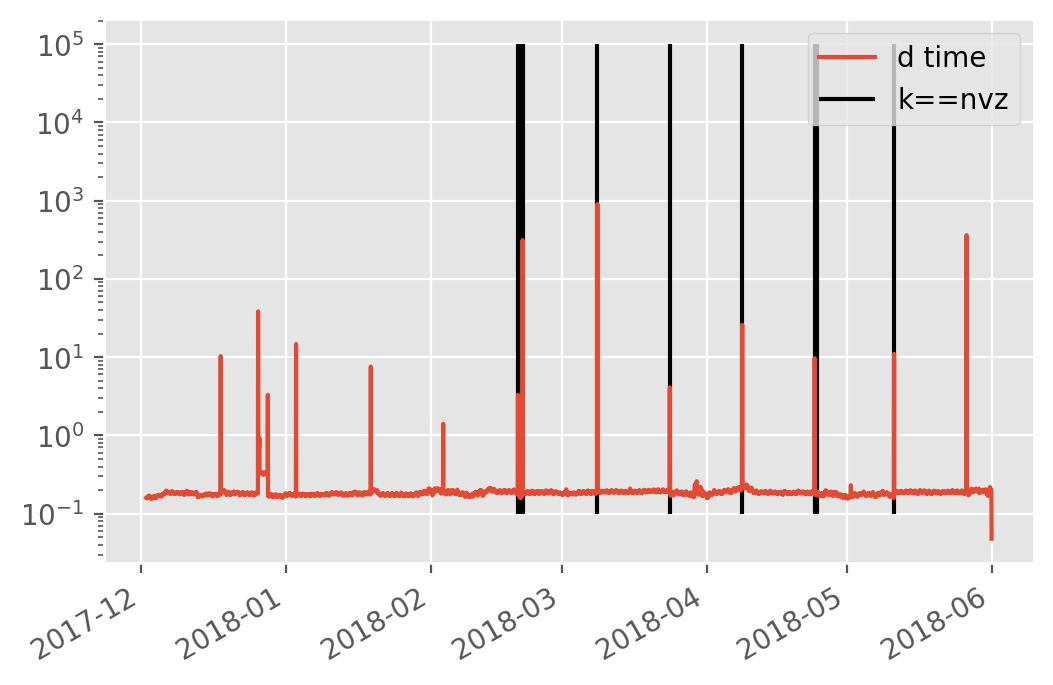

In [247]:
f,ax=splot()
# cdf.plot(x=dtime,y='y',style='o',ax=ax)
# ax.vlines(cdf.set_index(dtime),.1,1e5)
# f,ax=splot()
ax.vlines(cdf.set_index(dtime).index,.1,1e5,label='k==nvz')

print(ax.get_xlim())
ucp.set_dpi(200)
ax.plot_date(wrf_df[file_time],wrf_df[time_delta],ls='-',fmt=',',
#                  figsize=(10,3),
             label = 'd time'
                )
ax.set_yscale('log')
ax.legend()
f.autofmt_xdate()


In [248]:
!jupyter-nbconvert --to markdown check_ric_not_found_files.ipynb

[NbConvertApp] Converting notebook check_ric_not_found_files.ipynb to markdown
[NbConvertApp] Support files will be in check_ric_not_found_files_files/
[NbConvertApp] Making directory check_ric_not_found_files_files
[NbConvertApp] Writing 2268 bytes to check_ric_not_found_files.md
